In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("Airlines+Data.xlsx")
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
df.shape

(96, 2)

In [4]:
list(df)

['Month', 'Passengers']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df["Month"]= df.Month.dt.strftime("%b") #month extraction

In [ ]:
df["Year"] = df["Month"].dt.year  #Year extraction


In [13]:
df

,Month,Passengers,month,year,Year
0,Jan,112,Jan,1995,1995
1,Feb,118,Feb,1995,1995
2,Mar,132,Mar,1995,1995
3,Apr,129,Apr,1995,1995
4,May,121,May,1995,1995
...,...,...,...,...,...
91,Aug,405,Aug,2002,2002
92,Sep,355,Sep,2002,2002
93,Oct,306,Oct,2002,2002
94,Nov,271,Nov,2002,2002


<Axes: xlabel='month', ylabel='year'>

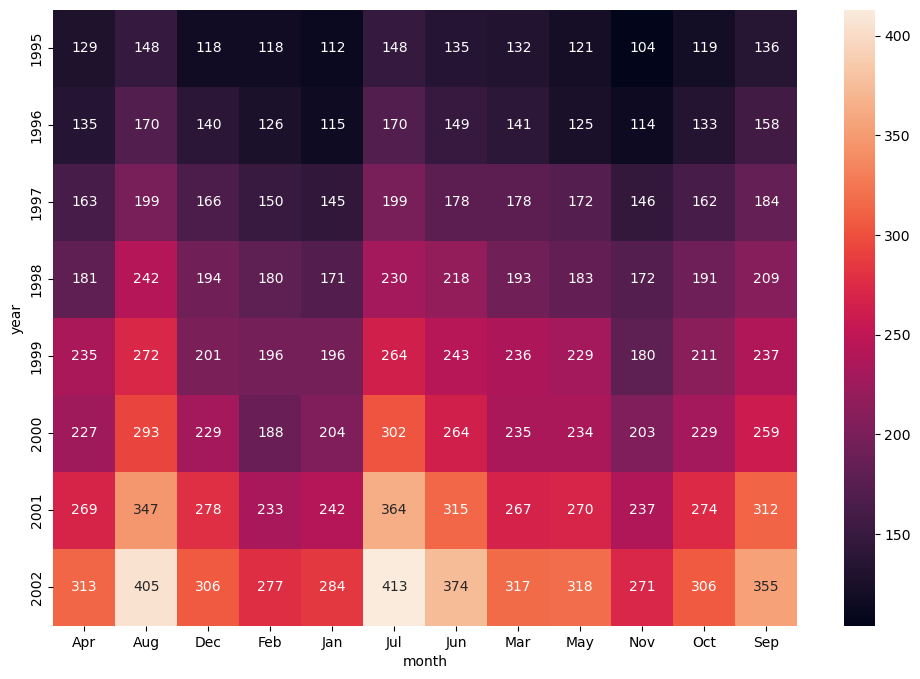

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create a pivot table directly without creating a new DataFrame column
heatmap_y_month = df.pivot_table(values='Passengers', index='Year', columns='Month', fill_value=0)

# Use Seaborn's heatmap function
sns.heatmap(heatmap_y_month, annot=True, fmt="g", cmap="YlGnBu")

plt.show()


In [15]:
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='year'>

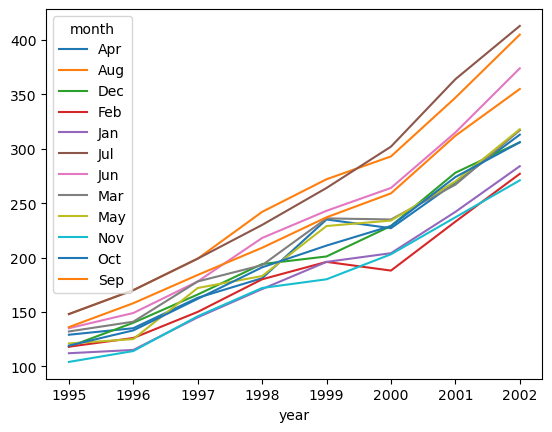

In [16]:
heatmap_y_month.plot()

<Axes: xlabel='month', ylabel='Passengers'>

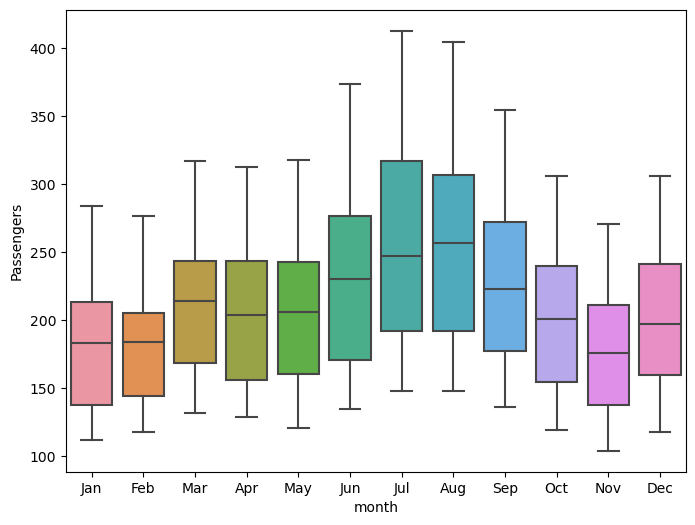

In [17]:
#boxplot for ever
plt.figure(figsize=(8,6))
#plt subplot
sns.boxplot(x="month",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

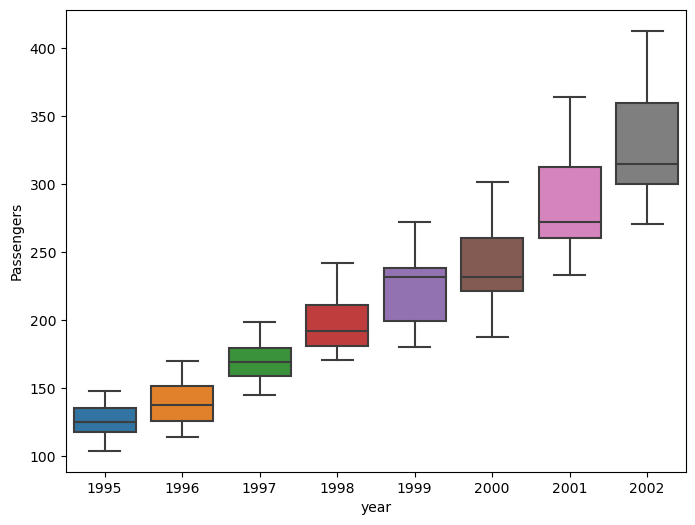

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="year",y="Passengers",data=df)

<Axes: xlabel='year', ylabel='Passengers'>

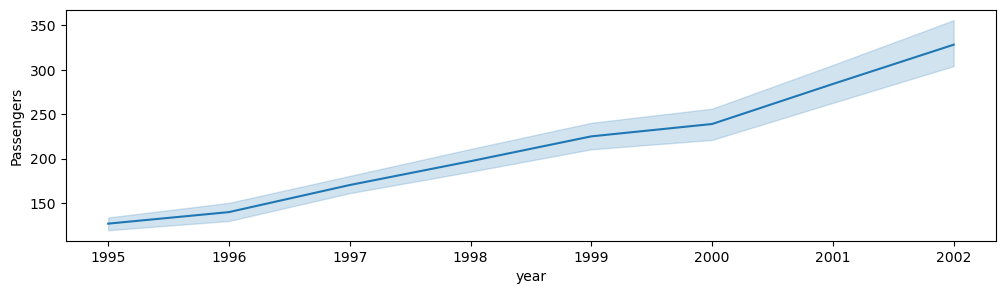

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

<Axes: >

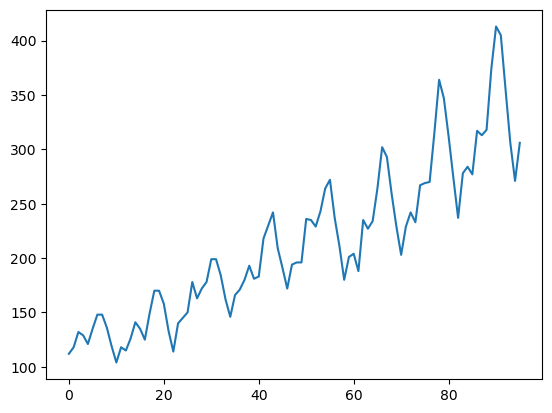

In [20]:
df.Passengers.plot()

<Axes: xlabel='year'>

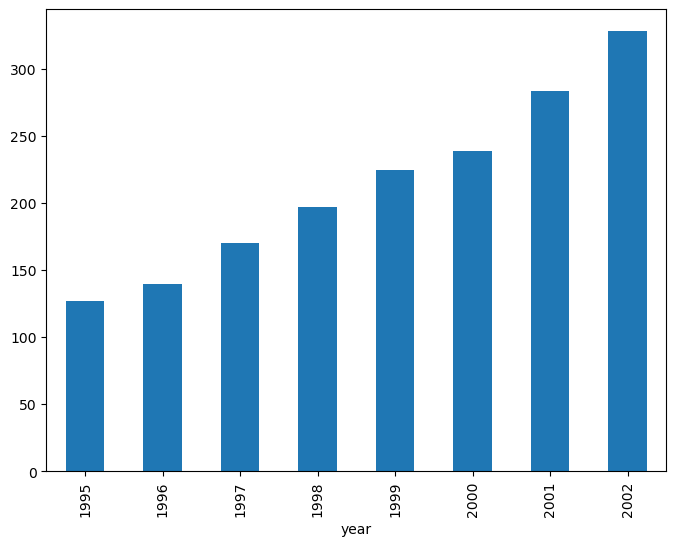

In [21]:
plt.figure(figsize=(8,6))
df.groupby('year')['Passengers'].mean().plot(kind='bar')

<Axes: xlabel='month'>

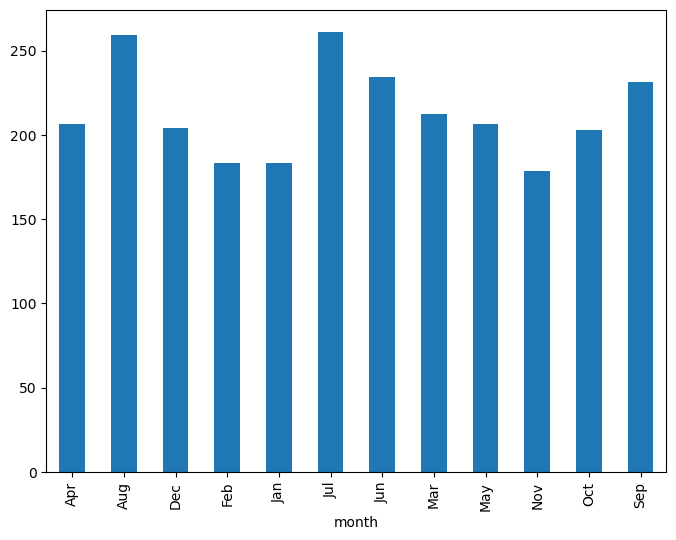

In [22]:
plt.figure(figsize=(8,6))
df.groupby('month')['Passengers'].mean().plot(kind='bar')

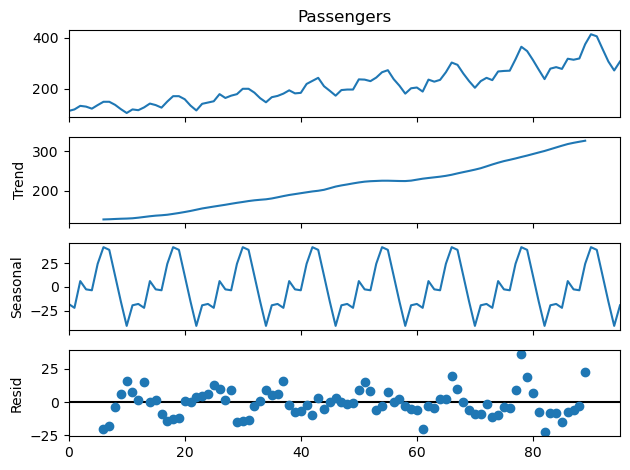

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

In [24]:
df_trans=df.copy()

In [25]:
df_trans['t']= np.arange(1,97)

In [26]:
df_trans['log']= np.log(df['Passengers']) #log transform of data

In [27]:
df_trans['t_sq']= df['Passengers']*df['Passengers'] # taking sq

In [28]:
df_trans

,Month,Passengers,month,year,Year,t,log,t_sq
0,Jan,112,Jan,1995,1995,1,4.718499,12544
1,Feb,118,Feb,1995,1995,2,4.770685,13924
2,Mar,132,Mar,1995,1995,3,4.882802,17424
3,Apr,129,Apr,1995,1995,4,4.859812,16641
4,May,121,May,1995,1995,5,4.795791,14641
...,...,...,...,...,...,...,...,...
91,Aug,405,Aug,2002,2002,92,6.003887,164025
92,Sep,355,Sep,2002,2002,93,5.872118,126025
93,Oct,306,Oct,2002,2002,94,5.723585,93636
94,Nov,271,Nov,2002,2002,95,5.602119,73441


In [29]:
train= df_trans.head(int(len(df_trans['Passengers'])*0.7))
train

,Month,Passengers,month,year,Year,t,log,t_sq
0,Jan,112,Jan,1995,1995,1,4.718499,12544
1,Feb,118,Feb,1995,1995,2,4.770685,13924
2,Mar,132,Mar,1995,1995,3,4.882802,17424
3,Apr,129,Apr,1995,1995,4,4.859812,16641
4,May,121,May,1995,1995,5,4.795791,14641
...,...,...,...,...,...,...,...,...
62,Mar,235,Mar,2000,2000,63,5.459586,55225
63,Apr,227,Apr,2000,2000,64,5.424950,51529
64,May,234,May,2000,2000,65,5.455321,54756
65,Jun,264,Jun,2000,2000,66,5.575949,69696


In [30]:
test= df_trans.tail(int(len(df_trans['Passengers'])-len(train)))

In [31]:
test

,Month,Passengers,month,year,Year,t,log,t_sq
67,Aug,293,Aug,2000,2000,68,5.680173,85849
68,Sep,259,Sep,2000,2000,69,5.556828,67081
69,Oct,229,Oct,2000,2000,70,5.433722,52441
70,Nov,203,Nov,2000,2000,71,5.313206,41209
71,Dec,229,Dec,2000,2000,72,5.433722,52441
72,Jan,242,Jan,2001,2001,73,5.488938,58564
73,Feb,233,Feb,2001,2001,74,5.451038,54289
74,Mar,267,Mar,2001,2001,75,5.587249,71289
75,Apr,269,Apr,2001,2001,76,5.594711,72361
76,May,270,May,2001,2001,77,5.598422,72900


In [32]:
#model buildings

import statsmodels.formula.api as smf

In [33]:
#linear model
linear_model=smf.ols('Passengers~t',data=train).fit()
pred_linear= pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.56251704229223

In [34]:
print('predicted data')
pred_linear.head(10)

predicted data


67    247.789688
68    249.829156
69    251.868625
70    253.908093
71    255.947562
72    257.987030
73    260.026499
74    262.065967
75    264.105435
76    266.144904
dtype: float64

In [35]:
print('original data')
test['Passengers'].head(10)

original data


67    293
68    259
69    229
70    203
71    229
72    242
73    233
74    267
75    269
76    270
Name: Passengers, dtype: int64

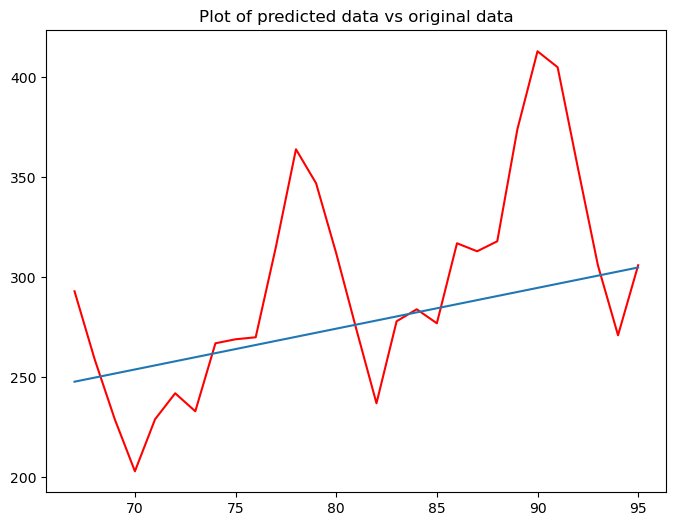

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Plot of predicted data vs original data')

# Plot original data in red
sns.lineplot(data=test, x=test.index, y='Passengers', color='r', label='Original Data')

# Plot predicted data
sns.lineplot(data=pred_linear, label='Predicted Data')

plt.show()


In [37]:
#quadratic
Quad = smf.ols('Passengers~t+t_sq',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t','t_sq']]))
rmse_Quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

37.02470119391692

In [38]:
print('predicted data')
pred_Quad.head(10)

predicted data


67    309.135804
68    265.994891
69    232.410205
70    206.714962
71    233.023371
72    247.504561
73    237.914616
74    277.575815
75    280.364054
76    281.918410
dtype: float64

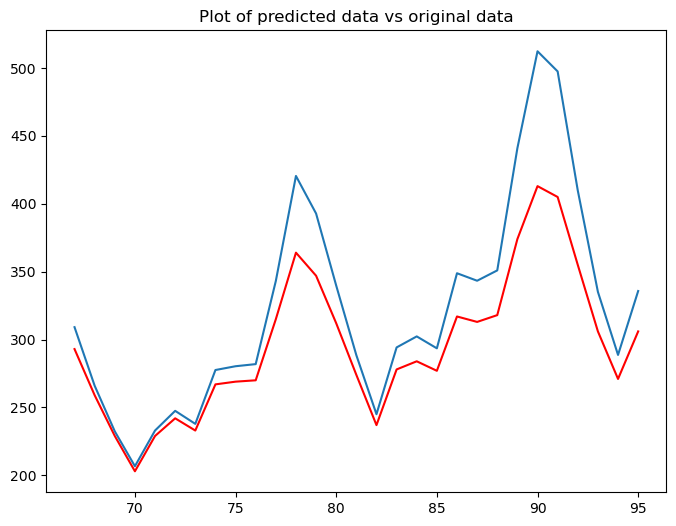

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Plot of predicted data vs original data')

# Plot original data in red
sns.lineplot(data=test, x=test.index, y='Passengers', color='r', label='Original Data')

# Plot predicted data
sns.lineplot(data=pred_Quad, label='Predicted Data (Quadratic)')

plt.show()


In [40]:
#exponential
exp= smf.ols('log~t',data=train).fit()
pred_exp= pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

42.21818467858794

In [41]:
print('predicted data')
pred_exp.head(10)

predicted data


67    5.546294
68    5.557887
69    5.569480
70    5.581073
71    5.592666
72    5.604259
73    5.615852
74    5.627445
75    5.639038
76    5.650631
dtype: float64

In [42]:
print('original data')
test['Passengers'].head(10)

original data


67    293
68    259
69    229
70    203
71    229
72    242
73    233
74    267
75    269
76    270
Name: Passengers, dtype: int64

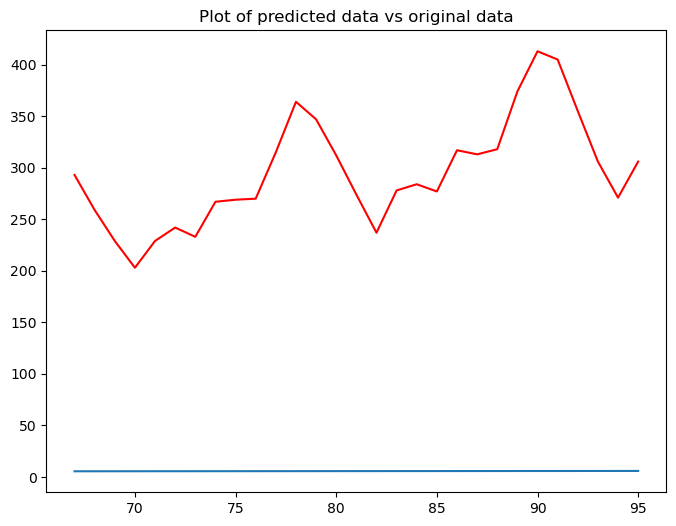

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Plot of predicted data vs original data')

# Plot original data in red
sns.lineplot(data=test, x=test.index, y='Passengers', color='r', label='Original Data')

# Plot predicted data
sns.lineplot(data=pred_exp, label='Predicted Data')

plt.show()


In [44]:
#log with Sq
exp= smf.ols('log~t+t_sq',data=train).fit()
pred_log_sq= pd.Series(exp.predict(test[['t','t_sq']]))
rmse_log_sq=np.sqrt(np.mean((np.array(test['log'])-np.array(pred_log_sq))**2))
rmse_log_sq

0.3314728391859803

In [45]:
print('predicted data')
pred_log_sq.head(10)


predicted data


67    5.841254
68    5.635614
69    5.475922
70    5.354163
71    5.482444
72    5.553858
73    5.509536
74    5.702019
75    5.717212
76    5.726472
dtype: float64

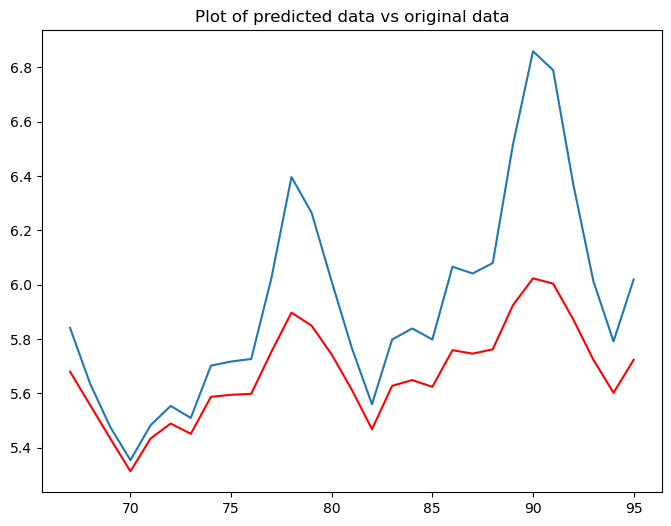

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.title('Plot of predicted data vs original data')

# Plot original log-transformed data in red
sns.lineplot(data=test, x=test.index, y='log', color='r', label='Original Data (log)')

# Plot predicted log-transformed data
sns.lineplot(data=pred_log_sq, label='Predicted Data (log)')

plt.show()


In [47]:
data={"MODEL":pd.Series(["rmse_linear","rmse_Quad","rmse_exp","rmse_log_sq"]),"RMSE_Values":pd.Series
      ([rmse_linear,rmse_Quad,rmse_exp,rmse_log_sq])}

In [48]:
type(data)

dict

In [49]:
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_log_sq,0.331473
1,rmse_Quad,37.024701
2,rmse_exp,42.218185
0,rmse_linear,47.562517


In [50]:
#predicting new data
df_trans

,Month,Passengers,month,year,Year,t,log,t_sq
0,Jan,112,Jan,1995,1995,1,4.718499,12544
1,Feb,118,Feb,1995,1995,2,4.770685,13924
2,Mar,132,Mar,1995,1995,3,4.882802,17424
3,Apr,129,Apr,1995,1995,4,4.859812,16641
4,May,121,May,1995,1995,5,4.795791,14641
...,...,...,...,...,...,...,...,...
91,Aug,405,Aug,2002,2002,92,6.003887,164025
92,Sep,355,Sep,2002,2002,93,5.872118,126025
93,Oct,306,Oct,2002,2002,94,5.723585,93636
94,Nov,271,Nov,2002,2002,95,5.602119,73441


In [51]:
#Build model on entire data set
model_full= smf.ols('log~t+t_sq',data=df_trans).fit()

In [52]:
pred_new  = pd.Series(np.exp(model_full.predict(df_trans)))
pred_new

0     126.610732
1     128.249299
2     131.355263
3     131.560781
4     130.931863
         ...    
91    467.089176
92    385.188668
93    327.093951
94    296.023759
95    330.812576
Length: 96, dtype: float64

In [53]:
rmse123=np.sqrt(np.mean((np.array(df_trans['Passengers'])-np.array(pred_new))**2))
rmse123

18.029433883575052

In [54]:
df_trans['predictions']=pred_new

In [55]:
df_trans

,Month,Passengers,month,year,Year,t,log,t_sq,predictions
0,Jan,112,Jan,1995,1995,1,4.718499,12544,126.610732
1,Feb,118,Feb,1995,1995,2,4.770685,13924,128.249299
2,Mar,132,Mar,1995,1995,3,4.882802,17424,131.355263
3,Apr,129,Apr,1995,1995,4,4.859812,16641,131.560781
4,May,121,May,1995,1995,5,4.795791,14641,130.931863
...,...,...,...,...,...,...,...,...,...
91,Aug,405,Aug,2002,2002,92,6.003887,164025,467.089176
92,Sep,355,Sep,2002,2002,93,5.872118,126025,385.188668
93,Oct,306,Oct,2002,2002,94,5.723585,93636,327.093951
94,Nov,271,Nov,2002,2002,95,5.602119,73441,296.023759
